In [1]:
import otter
grader = otter.Notebook()

# Lab 8: Confidence Intervals and Characteristics of Distributions

**Reading**: 
* [Estimation](https://www.inferentialthinking.com/chapters/13/Estimation.html)
* [Mean](https://inferentialthinking.com/chapters/14/1/Properties_of_the_Mean.html) and [Variability](https://inferentialthinking.com/chapters/14/2/Variability.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests. 

In this lab, we will learn how to generate confidence intervals from samples to infer information about a population. We will also introduce some important statistics characterizing distributions. 

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

import otter
grader = otter.Notebook()

## 1. Thai Restaurants


Ben and Frank are trying see what the best Thai restaurant in Eugene is. They survey 1500 UO students selected uniformly at random, and ask each student what Thai restaurant is the best (*Note: this data is fabricated for the purposes of this homework*). The choices of Thai restaurant are Sweet Basil Express, Drumrongthai, Manola's Thai Cuisine, and Tasty Thai. After compiling the results, Ben and Frank release the following percentages from their sample:

|Thai Restaurant  | Percentage|
|:------------:|:------------:|
|Sweet Basil Express | 8% |
|Drumrongthai | 52% |
|Manola's Thai Cuisine | 25% |
|Tasty Thai | 15% |

These percentages represent a uniform random sample of the population of UO students. The sample suggests that UO students heavily prefer Drumrongthai to other Thai restaurants, but to what extent does this sample reflect the overall population's preference (the entire population of all UO students)? To answer this, 

1. We could take more random samples and compare them to our initial sample. However, this is time- and cost-intensive and if we could do this, we probably would have taken a larger initial sample anyway.
2. We could take our estimate for UO's favorite Thai restaurant (Drumrongthai, 52%) at face value and decide that this is as good as it gets.
3. We could bootstrap our sample by resampling it thousands of times to create a confidence interval for our estimate.

You've probably guessed that the third option is our best one. But why? In lieu of having the true population estimate at hand, our sample is what we have to work with. The estimate itself is ok, but its even better to know how much this estimate might have varied (as if we had taken multiple random samples and not just one). By bootstrapping our sample, we are tacitly acknowledging that our sample estimate is almost certainly wrong, but a confidence interval derived via resampling provides a range of values that could contain the true value.


Using this sample, we will attempt to estimate the corresponding *parameters*, or the percentage of the votes that each restaurant will receive from the entire population. We will first attain confidence intervals by bootstrapping and then use them to compute a range of values that reflects the uncertainty of our estimates.

The table `votes` contains the results of the survey.

In [3]:
# Just run this cell
votes = Table.read_table('votes.csv')
votes

Vote
Sweet Basil Express
Sweet Basil Express
Sweet Basil Express
Sweet Basil Express
Sweet Basil Express
Sweet Basil Express
Sweet Basil Express
Sweet Basil Express
Sweet Basil Express
Sweet Basil Express


**Question 1.** Complete the function `one_resampled_percentage` below. It should return Drumrongthai's **percentage** of votes after simulating one bootstrap sample of `tbl`. Remember to sample *with* replacement, otherwise we'll end up with the same distribution as our sample.

**Note:** `tbl` will always be in the same format as `votes`.

<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [8]:
def one_resampled_percentage(tbl):
    thai = tbl.sample(1500)
    num_votes = votes.num_rows
    percentage = np.count_nonzero(thai.where('Vote', are.equal_to('Drumrongthai')).column('Vote'))/num_votes*100
    return percentage

one_resampled_percentage(votes)

52.86666666666666

In [9]:
grader.check("q1_1")

q1_1 results: All test cases passed!

We now have a function to compute a single bootstrap from our sample. But we'll need many more to create out confidence interval. 

**Question 2.** Complete the `percentages_in_resamples` function such that it returns an array of 2500 bootstrapped estimates of the percentage of voters who will vote for Drumrongthai. You should use the `one_resampled_percentage` function you wrote above.


<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [10]:
def percentages_in_resamples():
    percentage_drum = make_array()
    for i in np.arange(2500):
        sample = one_resampled_percentage(votes)
        percentage_drum = np.append(percentage_drum, sample)
    return percentage_drum


In [11]:
grader.check("q1_2")

q1_2 results: All test cases passed!

In the following cell, we run the function you just defined, `percentages_in_resamples`, and create a histogram of the calculated statistic for the 2,500 bootstrap estimates of the percentage of voters who voted for Drumrongthai. As you can see, we've derived not just a single estimate from our sample, but an entire distribution of estimates. Based on what the original Thai restaurant percentages were, does the graph seem reasonable? Talk to a friend or ask a TA if you are unsure!

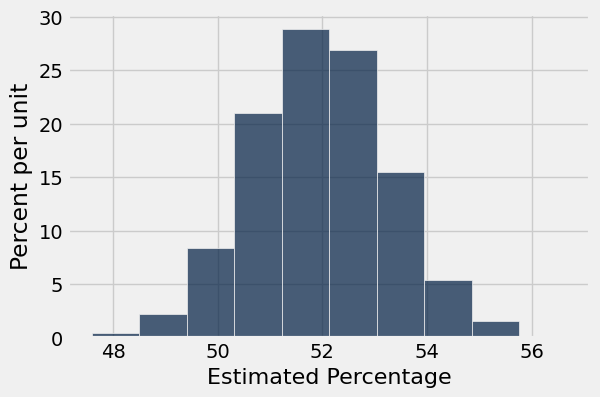

In [15]:
resampled_percentages = percentages_in_resamples()
Table().with_column('Estimated Percentage', resampled_percentages).hist("Estimated Percentage")

Now that we have our bootstrapped distribution, we only need to find our desired percentiles to create a confidence interval. 

**Question 3.** Using the array `resampled_percentages`, find the values at the two edges of the middle 95% of the bootstrapped percentage estimates. (Compute the lower and upper ends of the interval, named `drum_lower_bound` and `drum_upper_bound`, respectively.)

*Hint* If you're unsure how to do this, the book chapter on [percentiles](https://inferentialthinking.com/chapters/13/1/Percentiles.html) can help you out.

<!--
BEGIN QUESTION
name: q1_3
manual: false
-->

In [16]:
drum_lower_bound = percentile(2.5, resampled_percentages)
drum_upper_bound = percentile(97.5, resampled_percentages)
print("Bootstrapped 95% confidence interval for the percentage of Drumrongthai voters in the population: [{:f}, {:f}]".format(drum_lower_bound, drum_upper_bound))

Bootstrapped 95% confidence interval for the percentage of Drumrongthai voters in the population: [49.466667, 54.533333]


In [17]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 4.** The survey results seem to indicate that Drumrongthai is beating all the other Thai restaurants combined among voters. We would like to use confidence intervals to determine a range of likely values for Drumrongthai's true lead over all the other restaurants combined. The calculation for Drumrongthai's lead over Sweet Basil Express, Manola's Thai Cuisine, and Tasty Thai combined is:

**Drumrongthai's % of the vote - (Sweet Basil Thai's % + Manola Thai Cuisine's % + Tasty Thai's %)**

Define the function `one_resampled_difference` that returns **exactly one value** of Drumrongthai's percentage lead over Sweet Basil Express, Manola's Thai Cuisine, and Tasty Thai combined from one bootstrap sample of `tbl`.

<!--
BEGIN QUESTION
name: q1_4
manual: false
-->

In [18]:
def one_resampled_difference(tbl):
    bootstrap = tbl.sample()
    drum_percentage = np.count_nonzero(bootstrap.where('Vote', 'Drumrongthai').column('Vote'))/bootstrap.num_rows
    sbe_percentage = np.count_nonzero(bootstrap.where('Vote', 'Sweet Basil␣Thai').column('Vote'))/bootstrap.num_rows
    mtc_percentage = np.count_nonzero(bootstrap.where('Vote', 'Manola Thai␣Cuisine').column('Vote'))/bootstrap.num_rows
    tt_percentage = np.count_nonzero(bootstrap.where('Vote', 'Tasty Thai').column('Vote'))/bootstrap.num_rows

    return drum_percentage - (sbe_percentage + mtc_percentage + tt_percentage)

In [19]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 5.**
Write a function called `leads_in_resamples` that finds 2,500 bootstrapped estimates (the result of calling `one_resampled_difference`) of Drumrongthai's lead over Sweet Basil Express, Manola's Thai Cuisine, and Tasty Thai combined. Plot a histogram of the resulting samples. 

**Note:** Drumrongthai's lead can be negative.

<!--
BEGIN QUESTION
name: q1_5
manual: true
-->
<!-- EXPORT TO PDF -->

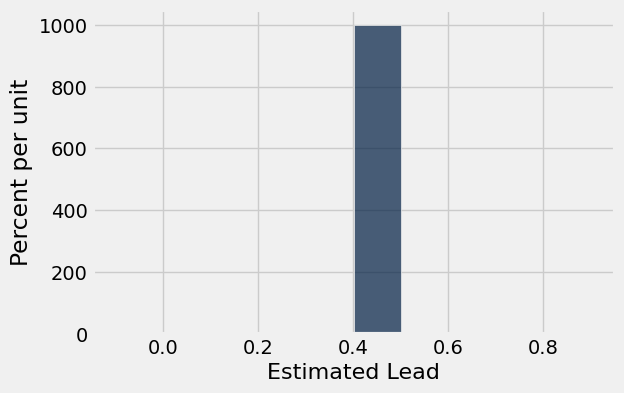

In [32]:
def leads_in_resamples():
    leads = make_array()
    for i in np.arange(2500):
        bootstrap = votes.sample()
    drum_percentage = np.count_nonzero(bootstrap.where('Vote', 'Drumrongthai').column('Vote'))/bootstrap.num_rows
    sbe_percentage = np.count_nonzero(bootstrap.where('Vote', 'Sweet Basil␣Thai').column('Vote'))/bootstrap.num_rows
    mtc_percentage = np.count_nonzero(bootstrap.where('Vote', 'Manola Thai␣Cuisine').column('Vote'))/bootstrap.num_rows
    tt_percentage = np.count_nonzero(bootstrap.where('Vote', 'Tasty Thai').column('Vote'))/bootstrap.num_rows
    diffs = drum_percentage - (sbe_percentage + mtc_percentage + tt_percentage)
    leads = np.append(leads,diffs)
    return leads

sampled_leads = leads_in_resamples()
Table().with_column('Estimated Lead', sampled_leads).hist("Estimated Lead")

**Question 6.** Use the simulated data from Question 5 to compute an approximate 95% confidence interval for Drumrongthai's true lead over Sweet Basil Express, Manola's Thai Cuisine, and Tasty Thai combined.

<!--
BEGIN QUESTION
name: q1_6
manual: false
-->

In [39]:
diff_lower_bound = percentile(2.5, sampled_leads)
diff_upper_bound = percentile(97.5, sampled_leads)
print("Bootstrapped 95% confidence interval for Drumrongthai's true lead over Sweet Basil Express, Manola's Thai Cuisine, and Tasty Thai combined: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for Drumrongthai's true lead over Sweet Basil Express, Manola's Thai Cuisine, and Tasty Thai combined: [0.400667, 0.400667]


In [40]:
grader.check("q1_6")

q1_6 results: All test cases passed!

## 2. Interpreting Confidence Intervals


The staff computed the following 95% confidence interval for the percentage of Drumrongthai voters: 

$$[49.40, 54.47]$$

(Your answer may have been a bit different; that doesn't mean it was wrong!)

#### Question 1
Can we say there is a 95% probability that the interval [49.40, 54.47] contains the true percentage of the population that votes for Drumrongthai as the best Eugene Thai restaurant? Assign `confidence95` to the answer you believe is correct.


<!--
BEGIN QUESTION
name: q2_1
manual: true
-->
<!-- EXPORT TO PDF -->

1. No, we can only say that we're 95% confident our interval contains the true percentage of the sample.  
2. Yes, we can say that we're 95% confident our interval contains the true percentage of the population. 
3. No, we need a 100% confidence interval to say this. 
4. Yes, if we bootstrap enough times, we can converge on the true population value irrespective of confidence interval. 

In [41]:
confidence95 = 2

In [42]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2**

The staff also created 70%, 90%, and 99% confidence intervals from the same sample, but we forgot to label which confidence interval represented which percentages! Match each confidence level (70%, 90%, 99%) with its corresponding interval in the cell below by assiging `interval_ranges` to an array with 70, 90, and 99 in the correct order.

The intervals are below:

* [49.87, 54.00]
* [50.67, 53.27]
* [48.80, 55.40]

<!--
BEGIN QUESTION
name: q2_2
manual: true
-->
<!-- EXPORT TO PDF -->

In [43]:
interval_ranges = make_array(90, 70, 99)

In [44]:
grader.check("q2_2")

q2_2 results: All test cases passed!

#### Question 3
Suppose we produced 5,000 new samples (each one a uniform random sample of 1,500 voters/students) from the population and created a 95% confidence interval from each one. Roughly how many of those 5,000 intervals do you expect will actually contain the true percentage of the population?

Assign your answer to `true_percentage_intervals`.

<!--
BEGIN QUESTION
name: q2_3
manual: false
-->

In [45]:
true_percentage_intervals = 4750

In [46]:
grader.check("q2_3")

q2_3 results: All test cases passed!

Recall the second bootstrap confidence interval you created, which estimated Drumrongthai's lead over Sweet Basil Express, Manola's Thai Cuisine, and Tasty Thai combined. Among
voters in the sample, Drumrongthai's lead was 4%. The staff's 95% confidence interval for the true lead (in the population of all voters) was

$$[-0.80, 8.80]$$

Suppose we are interested in testing a simple yes-or-no question:

> "Is the percentage of votes for Drumrongthai tied with the percentage of votes for Sweet Basil Express, Manola's Thai Cuisine, and Tasty Thai combined?"

Our null hypothesis is that the percentages are equal, or equivalently, that Drumrongthai's lead is exactly 0. Our alternative hypothesis is that Drumrongthai's lead is not equal to 0.  In the questions below, don't compute any confidence interval yourself - use only the staff's 95% confidence interval.


**Question 4** 

Say we use a 5% P-value cutoff.  Do we reject the null, fail to reject the null, or are we unable to tell using our staff confidence interval?

Assign `restaurants_tied` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using our staff confidence interval

*Hint:* If you're confused, take a look at [this chapter](https://www.inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html) of the textbook.

<!--
BEGIN QUESTION
name: q2_4
manual: false
-->

In [47]:
restaurants_tied = 2

In [48]:
grader.check("q2_4")

q2_4 results: All test cases passed!

#### Question 5
What if, instead, we use a P-value cutoff of 1%? Do we reject the null, fail to reject the null, or are we unable to tell using our staff confidence interval?

Assign `cutoff_one_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using our staff confidence interval

<!--
BEGIN QUESTION
name: q2_5
manual: false
-->

In [49]:
cutoff_one_percent = 2

In [50]:
grader.check("q2_5")

q2_5 results: All test cases passed!

#### Question 6
What if we use a P-value cutoff of 10%? Do we reject, fail to reject, or are we unable to tell using our confidence interval?

Assign `cutoff_ten_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using our staff confidence interval

<!--
BEGIN QUESTION
name: q2_6
manual: false
-->

In [57]:
cutoff_ten_percent = 3

In [58]:
grader.check("q2_6")

q2_6 results: All test cases passed!

## 3. Mean and Standard Deviation of a Distribution

Finally, we'll wrap up with some general properties of distributions. Below is the distribution we created from our bootstrapped estimates Drumrongthai's preference among UO students. 

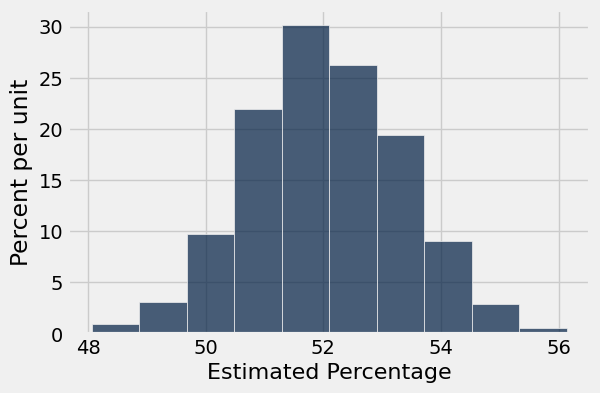

In [59]:
Table().with_column('Estimated Percentage', resampled_percentages).hist("Estimated Percentage")

This distribution is collated from the 2500 estimated percentages generated from `percentage_in_resamples()`. Every time we run our bootstrap routine, the distribution will look slightly different (due to randomness in the resampling process). However, two of its most important features remain consistent: the peak is always very near 52%, and most observations lie between 50 and 54%. In other words, consistent **central tendency** and **spread**. 

**Central tendency** is a measure of the "middle" of our data. It is typically measured in two ways:

1. The **mean**, also known as the average of our data
2. The **median**, also known as the 50th percentile of our data 

**Spread** is a measure of variability around the "middle" of our data. It is typically measured in two ways:

1. The **variance**, or the sum of the squared differences between each point of data and the mean of those data
2. More commonly, the **standard deviation**, which is just the square root of the variance. This gives us a measure of spread on the same scale as our data

How do these metrics translate to our distribution?

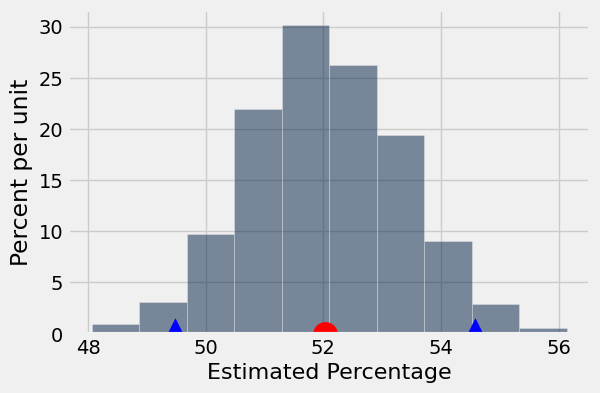

In [60]:
# Calculate the mean and standard deviation on our bootstrapped data
perc_mean = resampled_percentages.mean()
perc_sd = resampled_percentages.std()

# Plot a histogram 
Table().with_column('Estimated Percentage', resampled_percentages).hist("Estimated Percentage", alpha = 0.5)

# Add points for the mean (red) and two standard deviations in either direction from the mean (blue)
plt.scatter((perc_mean), 0, color='red', s=300);
plt.scatter(perc_mean+perc_sd*2, 0, marker='^', color='blue', s=500);
plt.scatter(perc_mean-perc_sd*2, 0, marker='^', color='blue', s=500);

The mean (red dot) is exactly where we expect it given the peak of our distributions. In symmetric distributions, the mean will be an effective representation of central tendency in our data. 

How do we interpret two standard deviations (blue triangles) in our data? Lets make the same plot again, but with our 95% CI upper and lower bounds in green. 

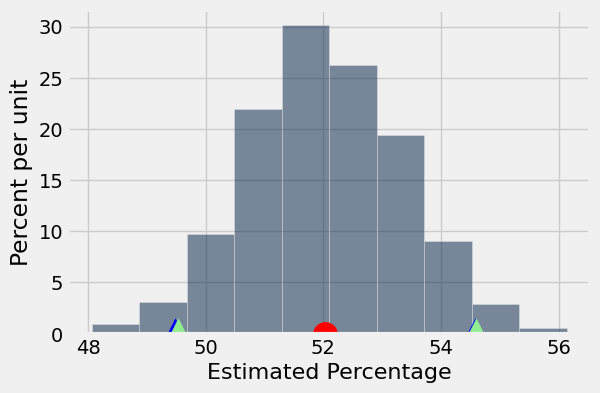

In [61]:
# Plot a histogram 
Table().with_column('Estimated Percentage', resampled_percentages).hist("Estimated Percentage", alpha = 0.5)

# Add points for the mean (red) and two standard deviations in either direction from the mean (blue)
plt.scatter((perc_mean), 0, color='red', s=300);
plt.scatter(perc_mean+perc_sd*2, 0, marker='^', color='blue', s=500);
plt.scatter(perc_mean-perc_sd*2, 0, marker='^', color='blue', s=500);
plt.scatter(drum_lower_bound, 0, marker='^', color='lightgreen', s=500);
plt.scatter(drum_upper_bound, 0, marker='^', color='lightgreen', s=500);

What does this mean? In a symmetric distribution like the one above, the 95% confidence interval will correspond to approximately 2 standard deviations from the mean in both directions. Thus, the mean approximates the center of our confidence intervals and the standard deviation corresponds closely to the size of its confidence interval as an estimate.

#### Asymmetric distributions

We have calculated the mean many times in this course, but are there ever situations where we would want a different measure of central tendency?

In [62]:
## Just run this cell
forest = Table.read_table('forest.csv').relabeled("perc_forest", "Percent of Land Forested")

The data loaded represents the percent of land forested in every country. Below is a histogram of these data, with the mean (blue) and median (green) plotted.

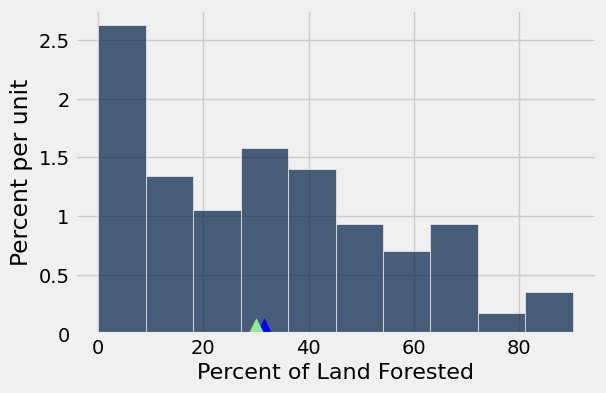

In [63]:
forest_mean = forest.column("Percent of Land Forested").mean()
forest_median = np.median(forest.column("Percent of Land Forested"))

forest.hist("Percent of Land Forested")
plt.scatter(forest_mean, 0, marker='^', color='blue', s=500);
plt.scatter(forest_median, 0, marker='^', color='lightgreen', s=500);

#### Question 1
In this case, the mean is slightly larger than the median. What accounts for this difference? Assign your answer to `mean_vs_median` below. 

1. High variance in the in the distribution
2. The distribution has two peaks, one in the middle and one around 0% land forested
3. A skew in the distribution to the right

<!--
BEGIN QUESTION
name: q3_1
manual: false
-->

In [64]:
mean_vs_median = 3

In [65]:
grader.check("q3_1")

q3_1 results: All test cases passed!

#### Question 2
Countries can apparently vary quite a bit in the percent of their land forested! How many standard deviations from the mean is the country with the highest percent of forested land?

<!--
BEGIN QUESTION
name: q3_2
manual: false
-->


In [66]:
deviations = 2.4

In [67]:
grader.check("q3_2")

q3_2 results: All test cases passed!

#### Question 3
Is the largest deviation from the mean calculated above a fair representation of spread in these data? Why or why not? Assign your answer to `appropriate_sd` below. 

1. Yes, because the variance is approximately equal on each side of the mean
2. No, because the variance is unequal between each side of the mean
3. No, because the bins associated with the most forested countries have few observations

<!--
BEGIN QUESTION
name: q3_3
manual: false
-->

In [68]:
appropriate_sd = 2

In [69]:
grader.check("q3_3")

q3_3 results: All test cases passed!

In this lab, we covered some more advanced methods for parameter estimation and hypothesis testing, and we dipped our toes into some of the most fundamental concepts in the description of data: center and spread. Well done! That's it! You've completed Lab 8. We covered a lot of ground in this lab, and there were a lot of points at which you should've stopped and understood exactly what was going on. Consult the textbook or ask your TA if you have any other questions!

Be sure to run the tests and verify that they all pass, then **Save** your changes, then **Download** your file to your host machine (if you are using jupyterhub), then submit your file to the HW7 assignment in **Canvas** by 11:59pm on the due date.